# **Data Cleaning**

In [706]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras
import tensorflow as tf

In [707]:
#Read the csv file into a DataFrame(df)
df = pd.read_csv('/content/data01.csv')
#Displays the first few rows of the Dataset
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [708]:
#gives shape( rows and columns ) of dataset
#returns tuple type
print(df.shape)
#checks for missing values "null" and "NaN" and returns the total in each column
print(df.isnull().sum())

(1177, 51)
group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 1

In [709]:
#Removes rows with missing 'outcome' values, it will not help us determine mortality rate
#inplace=True modifies df directly instead of creating a new df
df.dropna(subset = ['outcome'], inplace=True)
# Removes duplicate rows ( 1st occurrence is kept )
df.drop_duplicates()
# drops the group and ID columns (not relevant for our analysis)
# axis = 1 means drop column
df = df.drop(['group','ID'] , axis = 1)

In [710]:
#returns boolean df where True -> Nan for each column
# sum() counts True values
nan_counts = df.isna().sum()

# Print NaN counts by column
print("NaN counts by column:")
print(nan_counts)

# Print the percentage of NaN values in each column
total_rows = df.shape[0]
nan_percentages = (nan_counts / total_rows) * 100
print("\nNaN percentages by column:")
print(nan_percentages)

NaN counts by column:
outcome                       0
age                           0
gendera                       0
BMI                         214
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   12
Systolic blood pressure      15
Diastolic blood pressure     15
Respiratory rate             12
temperature                  18
SP O2                        12
Urine output                 35
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte        

In [711]:
# Fill NaN values with the mean of each column
df = df.fillna(df.mean())

In [712]:
# Checking if we were able to fill the NaN values with the mean
nan_counts = df.isna().sum()

# Print NaN counts by column
print("NaN counts by column:")
print(nan_counts)

NaN counts by column:
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR               

In [713]:
# checking for any null values
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

In [714]:
# this column was in terms of 1 and 2, easier to analyse in terms on '0' and '1'
df['gendera'] = df['gendera'] - 1
df['gendera']

0       0
1       1
2       1
3       1
4       1
       ..
1172    0
1173    0
1174    1
1175    1
1176    0
Name: gendera, Length: 1176, dtype: int64

# **Data Transformation**

**Normalization**

In [715]:
# to get columns of numeric type/ continuous variables
df_continuous = df.drop(['outcome', 'gendera', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD'],axis=1)
numerical_columns = df_continuous.select_dtypes(include='number').columns.tolist()
print(numerical_columns)

['age', 'BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']


In [716]:
from sklearn.preprocessing import MinMaxScaler
#minmax transforms data to a range between 0 and 1
# Initialize MinMaxScaler
scaler = MinMaxScaler()
#df_minmax stores new data
df_minmax = df.copy()
# Apply Min-Max scaling to numerical columns
df_minmax[numerical_columns] = scaler.fit_transform(df_minmax[numerical_columns])

In [717]:
#before
df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,0,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,1,30.188278,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,1,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,1,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,1,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [718]:
# After
df_minmax.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,0.6625,0,0.264576,0,0,0,1,1,0,...,0.601029,0.179679,0.683867,0.346185,0.455782,0.285714,0.238714,0.000000,0.266124,0.666667
1,0.0,0.7000,1,0.183812,0,0,0,0,1,0,...,0.604495,0.344118,0.430145,0.254886,0.182398,0.275510,0.591427,0.000000,0.742016,0.666667
2,0.0,0.8000,1,0.144350,0,0,0,0,1,0,...,0.650050,0.368627,0.605553,0.178313,0.283285,0.363265,0.508892,0.000000,0.660614,0.333333
3,0.0,0.3000,1,0.763099,0,0,0,0,0,0,...,0.594790,0.653394,0.279339,0.303270,0.203110,0.571429,0.738714,0.012766,0.704446,0.666667
4,0.0,0.7000,1,0.201673,1,0,0,0,1,0,...,0.549037,0.478431,0.573439,0.452209,0.093537,0.326531,0.262654,0.012766,0.391359,0.666667


In [719]:
df = df_minmax

#Stratified Sampling

A method that involves dividing a population into homogeneous subpopulations (called strata) based on specific characteristics

Stratified sampling ensures that we maintain the proportion of each outcome in the sampled data.

[0. 1.] [1017  159]


[]

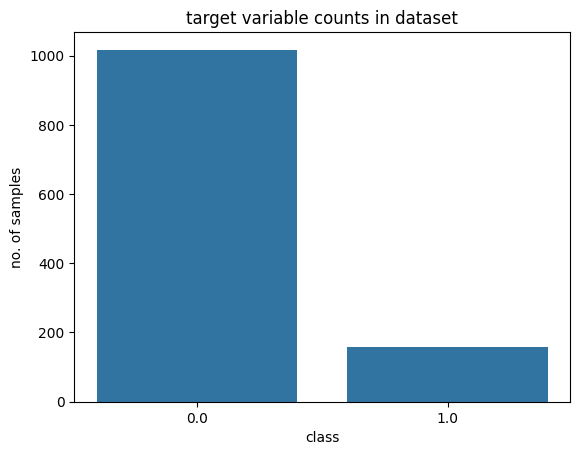

In [720]:
import seaborn as sns
#death=1, alive=0
(unique, counts) = np.unique(df['outcome'], return_counts=True)
print(unique,counts)
sns.barplot(x=unique, y=counts)
plt.xlabel("class")
plt.ylabel("no. of samples")
plt.title("target variable counts in dataset")
plt.plot()

In [721]:
df_stratified_sampling = df.copy()
# group by the outcome column (group for unique outcome)
grouped_df = df_stratified_sampling.groupby('outcome', group_keys=False)
# Apply stratified sampling within each group
# We sample a fraction (0.12 or 12%) of each group
stratified_sampled_df = grouped_df.apply(lambda x: x.sample(frac=0.12))
stratified_sampled_df.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
287,0.0,0.6375,1,0.202281,0,0,0,0,1,0,...,0.657180,0.178824,0.735138,0.134137,0.134694,0.588841,0.329685,0.127660,0.335446,0.583333
509,0.0,0.3500,1,0.097921,0,0,0,0,0,0,...,0.607268,0.141176,0.526113,0.279920,0.340892,0.711735,0.478112,0.217021,0.292960,0.666667
1107,0.0,0.8125,0,0.217774,1,0,0,1,0,1,...,0.594790,0.432353,0.508365,0.211446,0.177721,0.588841,0.496067,0.172778,0.335446,0.583333
107,0.0,0.5500,0,0.094847,1,0,0,0,0,0,...,0.618360,0.382353,0.740396,0.620080,0.183333,0.418367,0.042408,0.071489,0.335446,0.666667
1121,0.0,0.8250,1,0.180220,1,0,0,0,0,0,...,0.357706,0.510924,0.327604,0.431593,0.245276,0.588841,0.342453,0.172778,0.335446,0.666667


In [722]:
print(f"The total number of Unique Subdivisions in the Dataset: {len(df_stratified_sampling['outcome'].unique())}")
print(f"Total Number of Items Sampled: {stratified_sampled_df['outcome'].value_counts().sum()}")
stratified_sampled_df['outcome'].value_counts()

The total number of Unique Subdivisions in the Dataset: 2
Total Number of Items Sampled: 141


outcome
0.0    122
1.0     19
Name: count, dtype: int64

In [723]:
df = stratified_sampled_df

#Dividing into train and test

In [724]:
from sklearn.model_selection import train_test_split

X = df.drop(['outcome'], axis = 1)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#now we can use X_trai,Y_train to train our model

In [725]:
X_train.shape

(98, 48)

In [726]:
y_train.shape

(98,)

#Neural Network Model

In [727]:
from keras.models import Sequential
from keras.layers import Dense

In [728]:
#hyperparameters
hidden_layer_act='relu'
output_layer_act='sigmoid'
no_epochs=256

In [729]:
model = Sequential()
model.add(Dense(30, input_dim=48, activation=hidden_layer_act))
model.add(Dense(20, activation=hidden_layer_act))
model.add(Dense(10, activation=hidden_layer_act))
model.add(Dense(5, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [730]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 30)                1470      
                                                                 
 dense_83 (Dense)            (None, 20)                620       
                                                                 
 dense_84 (Dense)            (None, 10)                210       
                                                                 
 dense_85 (Dense)            (None, 5)                 55        
                                                                 
 dense_86 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2361 (9.22 KB)
Trainable params: 2361 (9.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [731]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

#Training the model

In [732]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only = True, mode = 'min')
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 20, verbose = 1)

In [733]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=no_epochs, batch_size = 10, callbacks = [callback_a,callback_b])

Epoch 1/256
10/10 [==============================] - 1s 29ms/step - loss: 0.6843 - accuracy: 0.5714 - val_loss: 0.6119 - val_accuracy: 0.8605
Epoch 2/256
10/10 [==============================] - 0s 9ms/step - loss: 0.5717 - accuracy: 0.8673 - val_loss: 0.5150 - val_accuracy: 0.8605
Epoch 3/256
10/10 [==============================] - 0s 9ms/step - loss: 0.4830 - accuracy: 0.8673 - val_loss: 0.4481 - val_accuracy: 0.8605
Epoch 4/256
10/10 [==============================] - 0s 7ms/step - loss: 0.4329 - accuracy: 0.8673 - val_loss: 0.4217 - val_accuracy: 0.8605
Epoch 5/256
10/10 [==============================] - 0s 9ms/step - loss: 0.4134 - accuracy: 0.8673 - val_loss: 0.4143 - val_accuracy: 0.8605
Epoch 6/256
10/10 [==============================] - 0s 7ms/step - loss: 0.4024 - accuracy: 0.8673 - val_loss: 0.4125 - val_accuracy: 0.8605
Epoch 7/256
10/10 [==============================] - 0s 9ms/step - loss: 0.3992 - accuracy: 0.8673 - val_loss: 0.4118 - val_accuracy: 0.8605
Epoch 8/256


#Evaluating the model

In [734]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.4483 - accuracy: 0.8605
[0.44826987385749817, 0.8604651093482971]
Loss =  0.44826987385749817
Accuracy =  0.8604651093482971


#check what the model predicts

In [735]:
print(X_test[0:5])
print(y_test[0:5])

         age  gendera       BMI  hypertensive  atrialfibrillation  \
470   0.5750        1  0.065716             1                   1   
1090  0.2250        0  0.145064             0                   0   
1101  0.8000        1  0.248167             1                   0   
1161  0.3125        0  0.193501             1                   0   
155   0.3625        0  0.626059             1                   0   

      CHD with no MI  diabetes  deficiencyanemias  depression  Hyperlipemia  \
470                0         1                  1           0             1   
1090               0         0                  0           0             0   
1101               0         1                  1           0             0   
1161               0         1                  1           0             1   
155                0         0                  0           0             0   

      ...  Blood sodium  Blood calcium  Chloride  Anion gap  Magnesium ion  \
470   ...      0.568051       0.

In [736]:
predicted = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [737]:
print(predicted[0:5])
print(predicted[0:5].round())

[[0.37299654]
 [0.01673873]
 [0.12179412]
 [0.1308752 ]
 [0.02247371]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


#Confusion Matrix

In [738]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

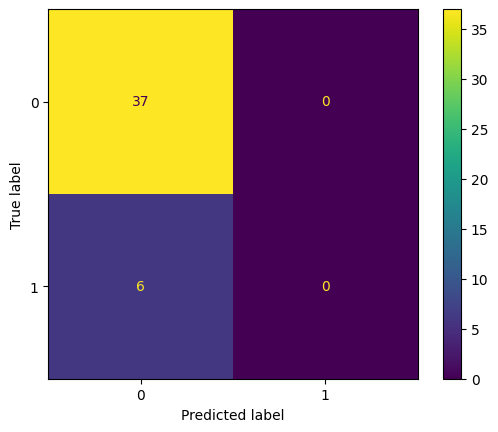

In [739]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

#RANDOM FOREST CLASSIFIER MODEL


Training completed.
Random Forest Classifier Accuracy: 0.8837209302325582
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        37
         1.0       1.00      0.17      0.29         6

    accuracy                           0.88        43
   macro avg       0.94      0.58      0.61        43
weighted avg       0.90      0.88      0.85        43



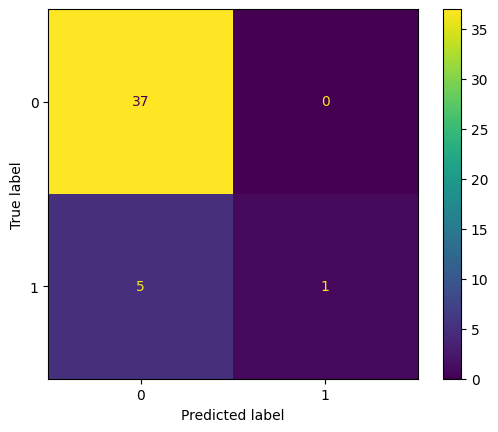

Model saved as random_forest_model.pkl.


In [740]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)
print("Training completed.")

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy and display classification report
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Generate and display the confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
rf_disp.plot()
plt.show()

# Save the model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, model_filename)
print(f"Model saved as {model_filename}.")


In [741]:
# Assuming rf_predictions is already defined as the predictions from the Random Forest model
# and X_test is your test features dataset

# Create a DataFrame from the test features and add a column for the predictions
test_results = pd.DataFrame(X_test)
test_results['Predicted'] = rf_predictions

# Optionally, you can add the true labels to compare predictions
test_results['Actual'] = y_test.reset_index(drop=True)

# Display the DataFrame with predictions and actual values (if included)
print(test_results)


         age  gendera       BMI  hypertensive  atrialfibrillation  \
470   0.5750        1  0.065716             1                   1   
1090  0.2250        0  0.145064             0                   0   
1101  0.8000        1  0.248167             1                   0   
1161  0.3125        0  0.193501             1                   0   
155   0.3625        0  0.626059             1                   0   
41    0.8750        0  0.189564             1                   1   
1089  0.8750        1  0.183812             0                   0   
442   0.7125        1  0.131582             0                   1   
921   0.7500        1  0.183812             1                   0   
172   0.6625        1  0.432990             1                   1   
54    0.7000        1  0.183812             1                   0   
826   0.4250        1  0.183812             1                   0   
473   0.8500        0  0.152623             0                   0   
530   0.8000        0  0.055550   

#SVM Model

SVM training completed.
SVM Classifier Accuracy: 0.8604651162790697
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        37
         1.0       0.00      0.00      0.00         6

    accuracy                           0.86        43
   macro avg       0.43      0.50      0.46        43
weighted avg       0.74      0.86      0.80        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


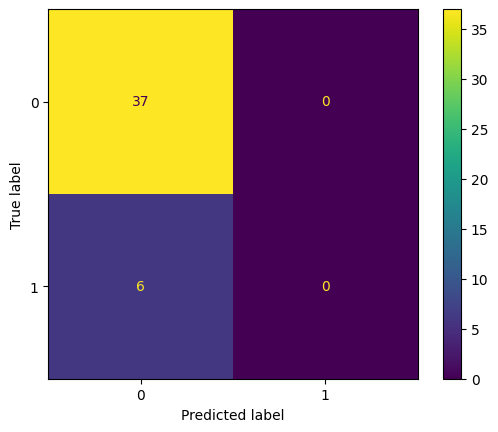

In [742]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)
print("SVM training completed.")

# Make predictions
svm_predictions = svm_classifier.predict(X_test)

# Calculate accuracy and display classification report
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Classifier Accuracy: {svm_accuracy}")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

# Generate and display the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix)
svm_disp.plot()
plt.show()
